                                    Experiment-3
Objective : 
Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_music = pd.read_excel('Music.xlsx')
df_music.head(5)

,Age,Gender,Genre
0,20,1,HIP HOP
1,24,1,HIP HOP
2,26,1,HIP HOP
3,27,1,ROCK
4,29,1,ROCK


In [3]:
#Identify X and y

X = df_music.drop('Genre',axis=1)
y = df_music['Genre']


In [4]:
X.shape,y.shape

((28, 2), (28,))

In [5]:
#Spilt your X and y into training and testing dataset

x_train_split = int(0.8 * len(X))
X_train,y_train = X[:x_train_split],y[:x_train_split]
X_test,y_test = X[x_train_split:],y[x_train_split:]

In [6]:
X_train.shape,y_train.shape

((22, 2), (22,))

In [7]:
X_test.shape,y_test.shape

((6, 2), (6,))

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.20)

In [9]:
X_train.shape, y_train.shape

((22, 2), (22,))

In [10]:
X_test.shape,y_test.shape

((6, 2), (6,))

In [11]:
#choose your relevent model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')

In [12]:
#Train your model with training data

model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [13]:
#predict the model outcome on unseen or test data

prediction = model.predict([[23, 1]])
prediction

c:\Users\khana\.conda\envs\ML_Experiments_B\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HIP HOP'], dtype=object)

In [14]:
predictions = model.predict(X_test)
predictions

array(['JAZZ', 'CLASSICAL', 'POP', 'JAZZ', 'ROCK', 'CLASSICAL'],
      dtype=object)

In [15]:
y_test

18         JAZZ
24    CLASSICAL
7           POP
16        DANCE
2       HIP HOP
25    CLASSICAL
Name: Genre, dtype: object

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)

0.6666666666666666

In [17]:
print(f'Correct Predictions are as:{accuracy_score(predictions,y_test,normalize=False)}')

Correct Predictions are as:4


In [18]:
print(f'Incorrect Predictions are as:{len(y_test) - accuracy_score(predictions,y_test,normalize=False)}')

Incorrect Predictions are as:2


In [19]:
from sklearn.tree import export_graphviz

In [20]:
export_graphviz(model,out_file='music-recommender-b2.dot',
                feature_names=['Age','Gender'],class_names=sorted(y.unique()),
                label='all',rounded=True,filled=True)

In [21]:
import pydotplus

In [22]:
decision_tree = pydotplus.graph_from_dot_file('music-recommender-b2.dot')

In [23]:
from IPython.display import Image

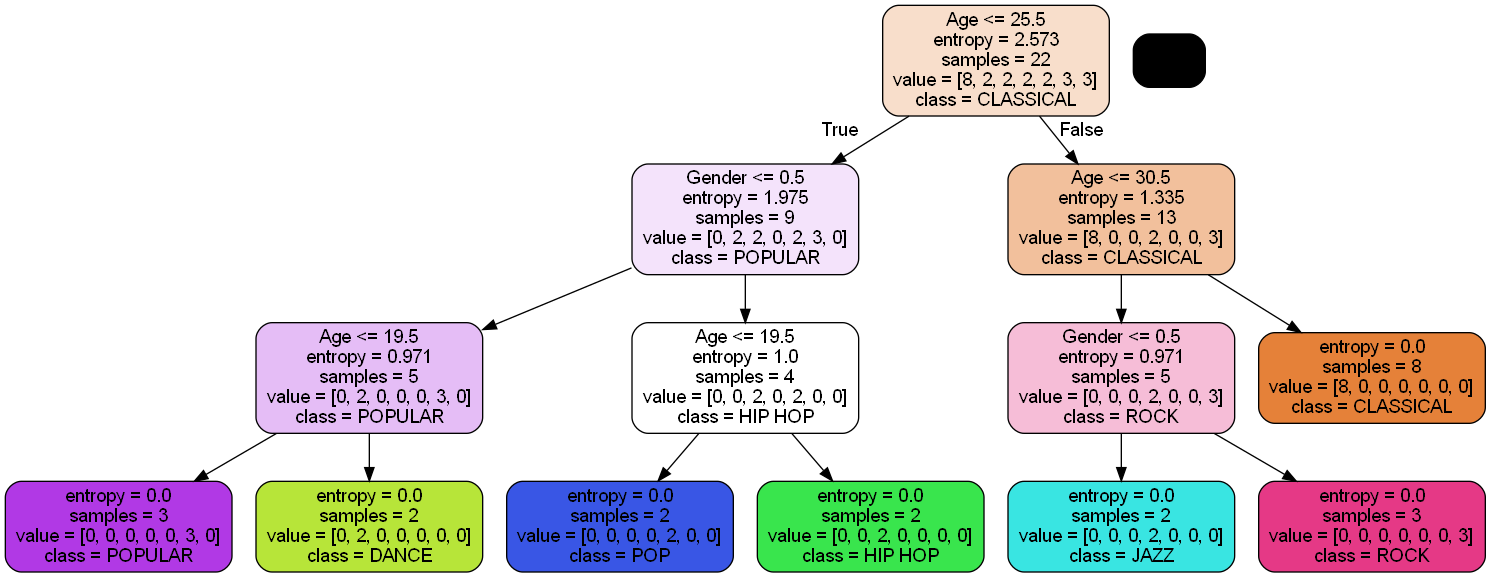

In [24]:
Image(decision_tree.create_png())

In [25]:
import joblib

In [26]:
joblib.dump(model,'music-recommender-model')

['music-recommender-model']